In [1]:
import pandas as pd

In [2]:
date_list0 = ['20100101 00:00',
 '20100101 01:00',
 '20100101 02:00',
 '20100101 03:00',
 '20100101 04:00']

date_list1 = ['20100101 00:00',
 '20100101 01:00',
 '20100101 02:00',
 '20100101 03:00',
 '20100101 04:00',
 '20100101 05:00',
 '20100101 06:00',
 '20100101 07:00',
 '20100101 08:00',
 '20100101 09:00']

## CREATING TIME SERIES

In [4]:
temperature_list0 = [46.2, 44.6, 44.1, 43.8, 43.5]
temperature_list1 = [46.2, 44.6, 44.1, 43.8, 43.5, 43.0, 43.1, 42.3, 42.5, 45.9]

# Prepare a format string: time_format
time_format = "%Y-%m-%d %H:%M"

# Convert date_list into a datetime object: my_datetimes
my_datetimes0 = pd.to_datetime(date_list0, format=time_format)  
my_datetimes1 = pd.to_datetime(date_list1, format=time_format)

# Construct a pandas Series using temperature_list and my_datetimes: time_series
ts0 = pd.Series(temperature_list0, index=my_datetimes0)
ts1 = pd.Series(temperature_list1, index=my_datetimes1)

ts0

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64

## INDEXING TIME SERIES

In [6]:
# Extract the hour from 1am to 2am on '2010-10-01': tsa
ts0.loc['20100101 01:00:00']

44.6

In [7]:
# Extract '2010-01-01' from ts0: tsb
ts0.loc["2010-01-01"]

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64

In [8]:
# Extract data from '2010-01-01' to '2010-12-31': tsc
ts0.loc["2010-01-01" : "2010-12-31"]

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64

## REINDEX AND COMBINE DATA

In [9]:
# Reindex without fill method: ts3
ts3 = ts0.reindex(ts1.index)
print(ts3)

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
2010-01-01 05:00:00     NaN
2010-01-01 06:00:00     NaN
2010-01-01 07:00:00     NaN
2010-01-01 08:00:00     NaN
2010-01-01 09:00:00     NaN
dtype: float64


In [10]:
# Reindex with fill method, using forward fill: ts4
ts4 = ts0.reindex(ts1.index, method="ffill")
print(ts4)

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
2010-01-01 05:00:00    43.5
2010-01-01 06:00:00    43.5
2010-01-01 07:00:00    43.5
2010-01-01 08:00:00    43.5
2010-01-01 09:00:00    43.5
dtype: float64


In [11]:
print(ts1 + ts0)

2010-01-01 00:00:00    92.4
2010-01-01 01:00:00    89.2
2010-01-01 02:00:00    88.2
2010-01-01 03:00:00    87.6
2010-01-01 04:00:00    87.0
2010-01-01 05:00:00     NaN
2010-01-01 06:00:00     NaN
2010-01-01 07:00:00     NaN
2010-01-01 08:00:00     NaN
2010-01-01 09:00:00     NaN
dtype: float64


## RESAMPLING

In [13]:
sales = pd.read_csv('sales-feb-2015.csv', parse_dates = True,
                    index_col = 'Date')

sales.head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


In [14]:
# Aggregating means
daily_mean = sales.resample('D').mean()
daily_mean

,Units
Date,
2015-02-02,6.0
2015-02-03,13.0
2015-02-04,13.5
2015-02-05,14.5
2015-02-06,NaN
2015-02-07,1.0
2015-02-08,NaN
2015-02-09,13.0
2015-02-10,NaN


In [15]:
# Verifying
print(daily_mean.loc['2015-2-2'])

Units    6.0
Name: 2015-02-02 00:00:00, dtype: float64


In [16]:
print(sales.loc['2015-2-2', 'Units'])

Date
2015-02-02 08:33:01    3
2015-02-02 20:54:49    9
Name: Units, dtype: int64


In [17]:
sales.loc['2015-2-2', 'Units'].mean()

6.0

In [18]:
# Method chaining
sales.resample('D').sum().max()

Units    29
dtype: int64

In [19]:
# Resampling strings
sales.resample('W').count()

,Company,Product,Units
Date,,,
2015-02-08,8,8,8
2015-02-15,4,4,4
2015-02-22,5,5,5
2015-03-01,3,3,3


In [20]:
# Multiplying frequencies
sales.loc[:,'Units'].resample('2W').sum()

Date
2015-02-08    82
2015-02-22    79
2015-03-08    15
Freq: 2W-SUN, Name: Units, dtype: int64

In [21]:
# Upsampling and filling
sales.loc['2015-2-4': '2015-2-5', 'Units'].resample('4H').ffill()

Date
2015-02-04 12:00:00     NaN
2015-02-04 16:00:00    13.0
2015-02-04 20:00:00    13.0
2015-02-05 00:00:00    14.0
2015-02-05 04:00:00    19.0
2015-02-05 08:00:00    19.0
2015-02-05 12:00:00    19.0
2015-02-05 16:00:00    19.0
2015-02-05 20:00:00    19.0
Freq: 4H, Name: Units, dtype: float64

## ROLLING MEAN = MOVING AVERAGE

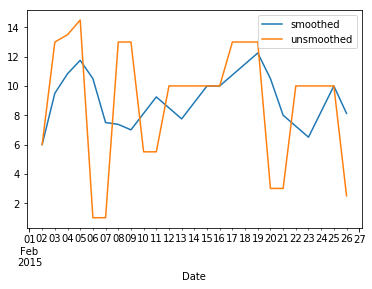

In [23]:
# Extract data daily unsmoothed
unsmoothed = sales.resample('D').mean().bfill()

# Applying a rolling mean with a 4 days window: smoothed
smoothed = unsmoothed.rolling(window = '4D').mean()

# Create a new DataFrame with columns smoothed and unsmoothed: MA
MA = pd.DataFrame({'smoothed':smoothed['Units'], 'unsmoothed':unsmoothed['Units']})

# Plot both smoothed and unsmoothed data using august.plot().
MA.plot()

## DATETIME METHOD

In [41]:
pd.Series(sales.index.values).dt.hour

0      8
1     12
2     14
3      8
4      0
5      1
6      8
7     20
8     21
9     13
10    22
11    22
12     8
13    22
14    15
15    16
16    10
17    20
18     5
19    20
dtype: int64

In [44]:
#### TIMEZONE
# Set timezone
central = pd.Series(sales.index.values).dt.tz_localize('US/Central')
central

0    2015-02-26 08:57:45-06:00
1    2015-02-16 12:09:19-06:00
2    2015-02-03 14:14:18-06:00
3    2015-02-02 08:33:01-06:00
4    2015-02-25 00:29:00-06:00
5    2015-02-05 01:53:06-06:00
6    2015-02-09 08:57:30-06:00
7    2015-02-11 20:03:08-06:00
8    2015-02-04 21:52:45-06:00
9    2015-02-09 13:09:55-06:00
10   2015-02-07 22:58:10-06:00
11   2015-02-11 22:50:44-06:00
12   2015-02-26 08:58:51-06:00
13   2015-02-05 22:05:03-06:00
14   2015-02-04 15:36:29-06:00
15   2015-02-19 16:02:58-06:00
16   2015-02-19 10:59:33-06:00
17   2015-02-02 20:54:49-06:00
18   2015-02-21 05:01:26-06:00
19   2015-02-21 20:41:47-06:00
dtype: datetime64[ns, US/Central]

In [43]:
# Convert timezone
central.dt.tz_convert('US/Eastern')

0    2015-02-26 09:57:45-05:00
1    2015-02-16 13:09:19-05:00
2    2015-02-03 15:14:18-05:00
3    2015-02-02 09:33:01-05:00
4    2015-02-25 01:29:00-05:00
5    2015-02-05 02:53:06-05:00
6    2015-02-09 09:57:30-05:00
7    2015-02-11 21:03:08-05:00
8    2015-02-04 22:52:45-05:00
9    2015-02-09 14:09:55-05:00
10   2015-02-07 23:58:10-05:00
11   2015-02-11 23:50:44-05:00
12   2015-02-26 09:58:51-05:00
13   2015-02-05 23:05:03-05:00
14   2015-02-04 16:36:29-05:00
15   2015-02-19 17:02:58-05:00
16   2015-02-19 11:59:33-05:00
17   2015-02-02 21:54:49-05:00
18   2015-02-21 06:01:26-05:00
19   2015-02-21 21:41:47-05:00
dtype: datetime64[ns, US/Eastern]

## VISUALIZATION

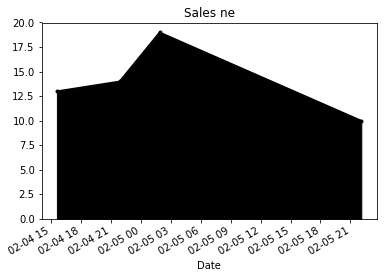

In [45]:
import matplotlib as plt
sales.loc['2015-2-4': '2015-2-5','Units'].plot(style='k.-', kind = 'area',
                                               title = 'Sales ne')

## CHANGE DATETIME INDEX

In [46]:
sales.index

DatetimeIndex(['2015-02-26 08:57:45', '2015-02-16 12:09:19',
               '2015-02-03 14:14:18', '2015-02-02 08:33:01',
               '2015-02-25 00:29:00', '2015-02-05 01:53:06',
               '2015-02-09 08:57:30', '2015-02-11 20:03:08',
               '2015-02-04 21:52:45', '2015-02-09 13:09:55',
               '2015-02-07 22:58:10', '2015-02-11 22:50:44',
               '2015-02-26 08:58:51', '2015-02-05 22:05:03',
               '2015-02-04 15:36:29', '2015-02-19 16:02:58',
               '2015-02-19 10:59:33', '2015-02-02 20:54:49',
               '2015-02-21 05:01:26', '2015-02-21 20:41:47'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [47]:
# transform the index datetime values to abbreviated days of the week. 
sales.index.strftime("%a")

Index(['Thu', 'Mon', 'Tue', 'Mon', 'Wed', 'Thu', 'Mon', 'Wed', 'Wed', 'Mon',
       'Sat', 'Wed', 'Thu', 'Thu', 'Wed', 'Thu', 'Thu', 'Mon', 'Sat', 'Sat'],
      dtype='object')